###Data Preprocessing


In [2]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib

In [8]:
df = pd.read_csv("HeartDisease.csv")
df
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())

(1190, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB
None
               age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000

In [9]:
column_names = {
    'age': 'Age',
    'sex': 'Sex',
    'chest pain type': 'ChestPainType',
    'resting bp s': 'RestingBloodPressure',
    'cholesterol': 'SerumCholesterol',
    'fasting blood sugar': 'FastingBloodSugar',
    'resting ecg': 'RestingECG',
    'max heart rate': 'MaxHeartRate',
    'exercise angina': 'ExerciseInducedAngina',
    'oldpeak': 'STDepression',
    'ST slope': 'SlopeSTSegment',
    'target': 'HeartDiseaseDiagnosis'
}

df.rename(columns=column_names, inplace=True)
df.head()

,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,STDepression,SlopeSTSegment,HeartDiseaseDiagnosis
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In this step, we binarize the target variable, simplifying the problem into a binary classification task. Values greater than 0 are assigned 1, indicating a positive diagnosis, while values equal to 0 remain 0, signifying a negative diagnosis.

In [10]:
#dataCleaning
df.replace('nan', np.nan, inplace=True)
df.dropna(inplace=True)

C:\Users\CHANDINI\AppData\Local\Temp\ipykernel_14408\270137225.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="HeartDiseaseDiagnosis", data=df, palette=["#87CEEB", "#FFA07A"])


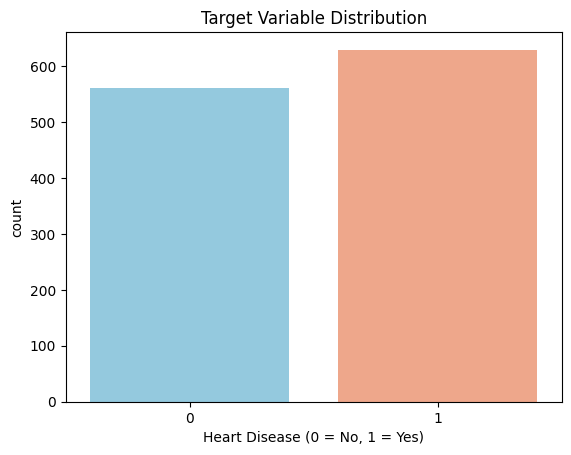

In [11]:
# Exploratory Data Analysis (EDA)
sns.countplot(x="HeartDiseaseDiagnosis", data=df, palette=["#87CEEB", "#FFA07A"])
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.title("Target Variable Distribution")
plt.show()

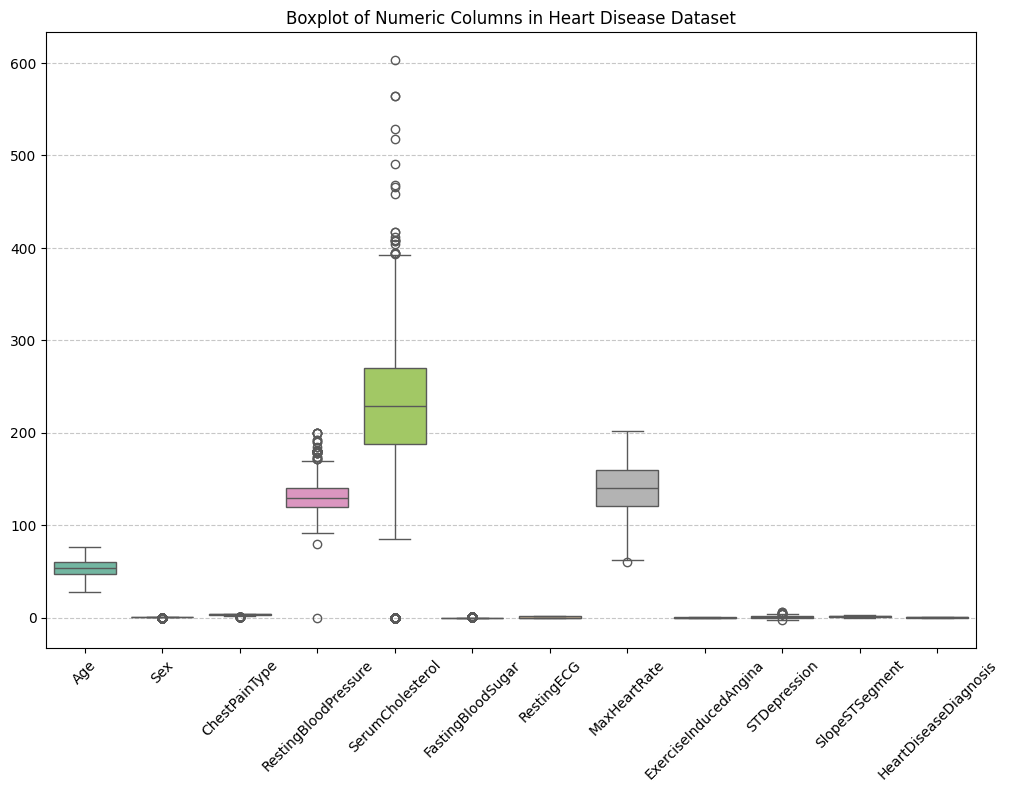

In [12]:
# Boxplot of Numeric Features
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_columns], palette="Set2")
plt.title("Boxplot of Numeric Columns in Heart Disease Dataset")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

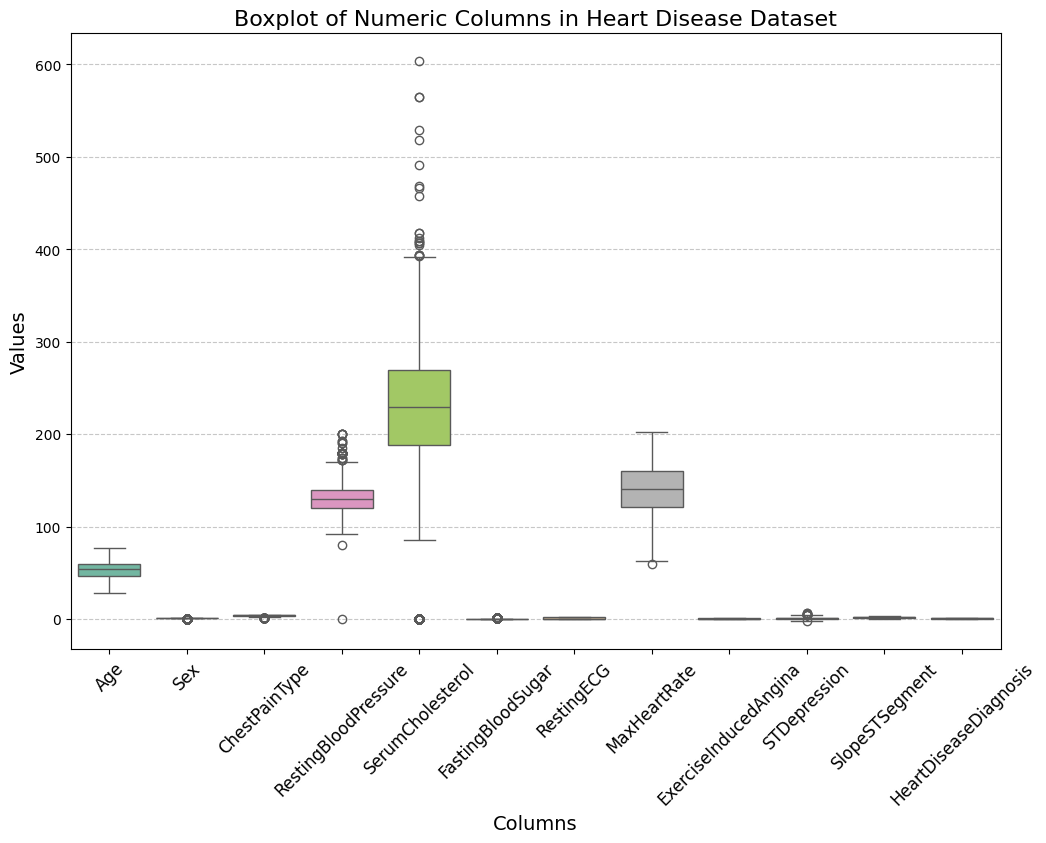

In [13]:
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_columns], palette="Set2")

plt.title('Boxplot of Numeric Columns in Heart Disease Dataset', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

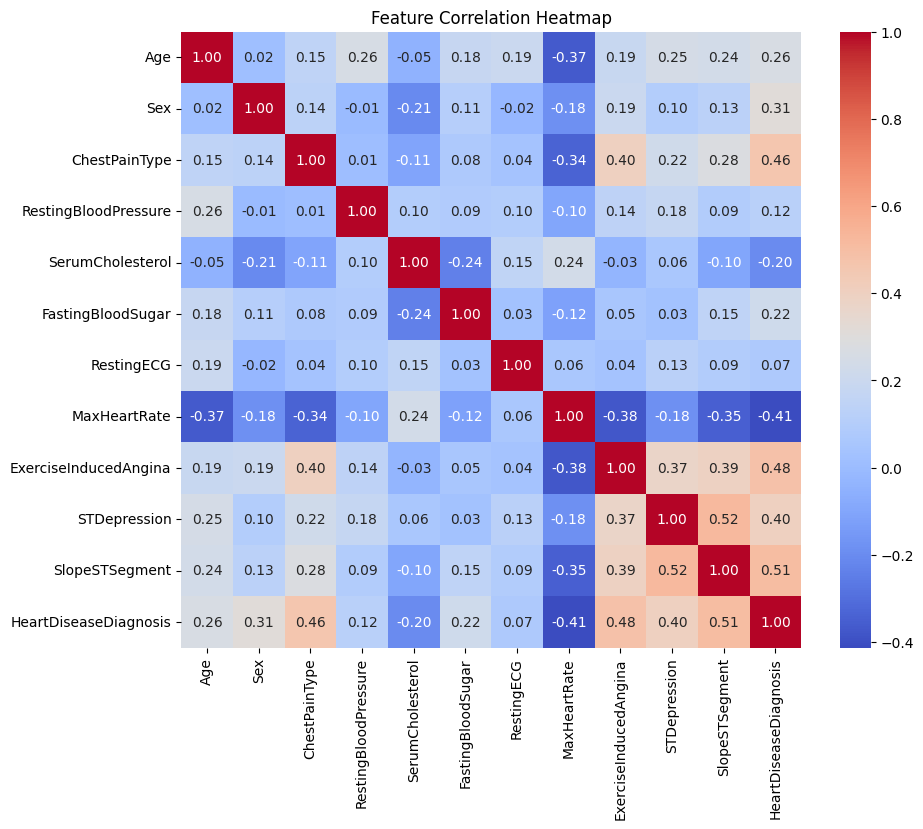

In [14]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

###Data Preparation for Machine Learning


In [15]:
# Select only 11 relevant features
selected_features = ["Age", "Sex", "ChestPainType", "RestingBloodPressure", 
                     "SerumCholesterol", "FastingBloodSugar", "RestingECG", 
                     "MaxHeartRate", "ExerciseInducedAngina", "STDepression", "SlopeSTSegment"]

In [16]:
X = df[selected_features] 
y = df["HeartDiseaseDiagnosis"]  # Target variable

In [17]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###Training the Random Forest Model

In [18]:
# Train RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate performance
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))


Model Accuracy: 94.54%
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       107
           1       0.93      0.97      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.94      0.94       238
weighted avg       0.95      0.95      0.95       238



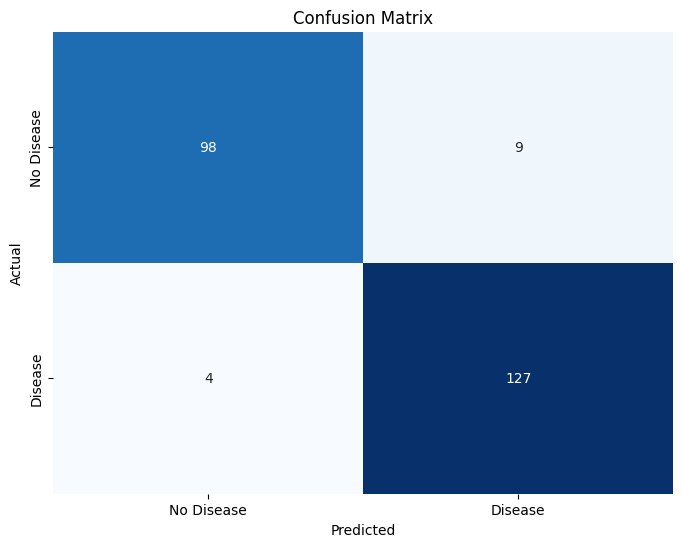

In [19]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

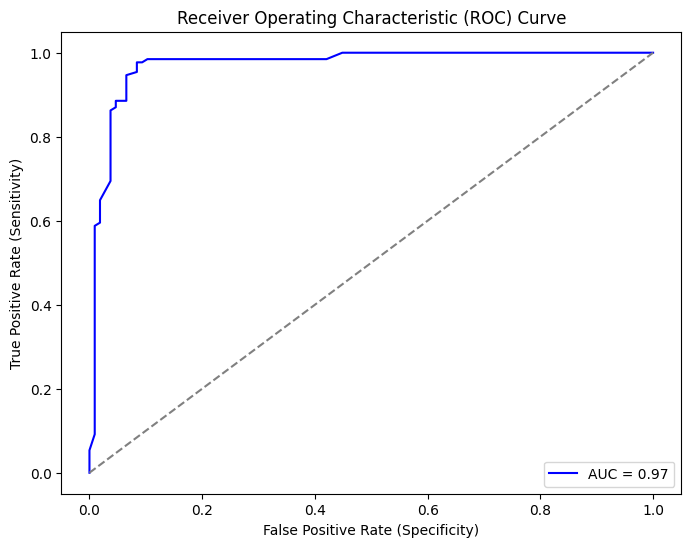

In [20]:
# ROC Curve
y_probs = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate (Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.legend()
plt.show()

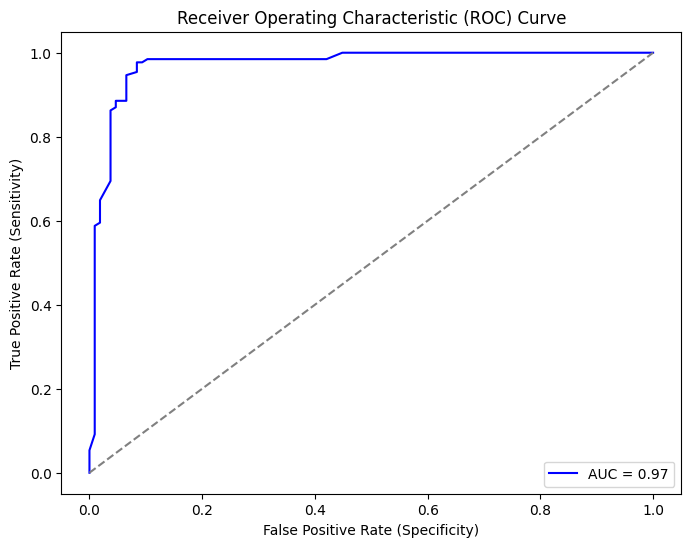

In [21]:
y_probs = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.show()

In [22]:
# Save the trained model
joblib.dump(model, "random_forest_model_11features.joblib")
print("✅ Model trained and saved as 'random_forest_model_11features.joblib'")
# Sample Prediction using exact values from dataset
positive_sample = df[df["HeartDiseaseDiagnosis"] == 1].iloc[0][selected_features]  # First positive case
positive_prediction = model.predict([positive_sample])
print("\nPositive Case Analysis:")
print(positive_sample)
print("Predicted Class:", "Heart Disease" if positive_prediction[0] == 1 else "No Heart Disease")

negative_sample = df[df["HeartDiseaseDiagnosis"] == 0].iloc[0][selected_features]  # First negative case
negative_prediction = model.predict([negative_sample])
print("\nNegative Case Analysis:")
print(negative_sample)
print("Predicted Class:", "Heart Disease" if negative_prediction[0] == 1 else "No Heart Disease")

✅ Model trained and saved as 'random_forest_model_11features.joblib'

Positive Case Analysis:
Age                       49.0
Sex                        0.0
ChestPainType              3.0
RestingBloodPressure     160.0
SerumCholesterol         180.0
FastingBloodSugar          0.0
RestingECG                 0.0
MaxHeartRate             156.0
ExerciseInducedAngina      0.0
STDepression               1.0
SlopeSTSegment             2.0
Name: 1, dtype: float64
Predicted Class: Heart Disease

Negative Case Analysis:
Age                       40.0
Sex                        1.0
ChestPainType              2.0
RestingBloodPressure     140.0
SerumCholesterol         289.0
FastingBloodSugar          0.0
RestingECG                 0.0
MaxHeartRate             172.0
ExerciseInducedAngina      0.0
STDepression               0.0
SlopeSTSegment             1.0
Name: 0, dtype: float64
Predicted Class: No Heart Disease


C:\Users\CHANDINI\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\CHANDINI\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
